Create a basic 1D function. x = f(y). A function to get squares is used.

In [10]:
import numpy as np
from numpy.random import rand
from numpy import hstack
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

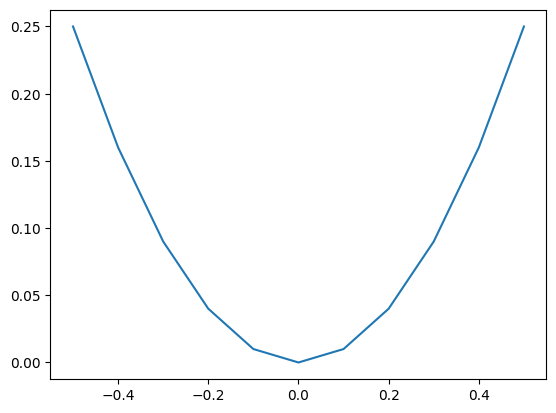

In [11]:
def get_squares(x):
  return x * x

inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
outputs = [get_squares(x) for x in inputs]

plt.plot(inputs, outputs)
plt.show()

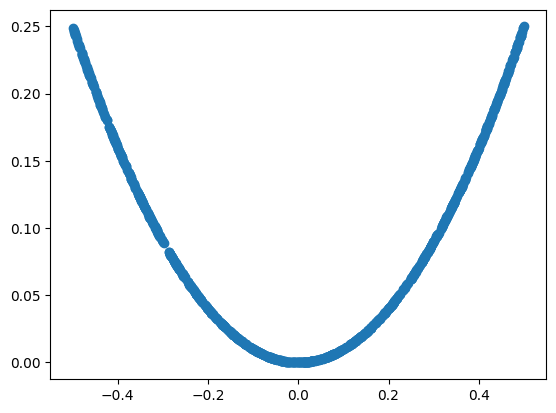

In [12]:
def generate(n):
  X = rand(n) - 0.5 # Range of -0.5 to 0.5
  y = X * X # Squared output
  X = X.reshape(n, 1) # 100 rows 1 column
  y = y.reshape(n, 1) # 100 rows 1 column
  return hstack((X,y)) # stacked into 100 rows 2 columns


data = generate(n=1000)
plt.scatter(data[:,0], data[:,1])
plt.show()

Discriminator

In [13]:
def discriminator_model(n_inputs=2):
  model = Sequential()
  model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

Functions to create Real and Fake Samples with class labels

In [14]:
def generate_real_data(n):
  X1 = rand(n) - 0.5
  X2 = X1 * X1
  X1 = X1.reshape(n,1)
  X2 = X2.reshape(n,1)
  X = hstack((X1,X2))
  y = np.ones((n,1))
  return X, y


def generate_fake_data(n):
  X1 = -1 + rand(n)*2
  X2 = -1 + rand(n)*2
  X1 = X1.reshape(n,1)
  X2 = X2.reshape(n,1)
  X = hstack((X1,X2))
  y = np.zeros((n,1))
  return X, y

In [15]:
def train_d_step(discriminatorModel, n_epochs=1000, batch_size=128):
  n = int(batch_size/2)
  for i in range(n_epochs):
    x_real, y_real = generate_real_data(n)
    discriminatorModel.train_on_batch(x_real, y_real)
    x_fake, y_fake = generate_fake_data(n)
    discriminatorModel.train_on_batch(x_fake, y_fake)
    loss_real, accuracy_real = discriminatorModel.evaluate(x_real, y_real, verbose=0)
    loss_fake, accuracy_fake = discriminatorModel.evaluate(x_fake, y_fake, verbose=0)
    print(f"Epoch: {i+1}: Accuracy_real: {accuracy_real} Accuracy_fake: {accuracy_fake}")

In [16]:
discriminator = discriminator_model()
discriminator.summary()
plot_model(discriminator, to_file='discriminator.png', show_shapes=True, show_layer_names=True)
train_d_step(discriminator)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 25)                75        
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch: 1: Accuracy_real: 0.40625 Accuracy_fake: 0.609375
Epoch: 2: Accuracy_real: 0.515625 Accuracy_fake: 0.5625
Epoch: 3: Accuracy_real: 0.453125 Accuracy_fake: 0.65625
Epoch: 4: Accuracy_real: 0.53125 Accuracy_fake: 0.6875
Epoch: 5: Accuracy_real: 0.484375 Accuracy_fake: 0.5625
Epoch: 6: Accuracy_real: 0.484375 Accuracy_fake: 0.59375
Epoch: 7: Accuracy_real: 0.5 Accuracy_fake: 0.625
Epoch: 8: Accuracy_real: